In [63]:
#Initialisierung importieren
import matplotlib.pyplot as plt
import numpy as np

#Qiskit importieren
from qiskit import *
from qiskit.tools import job_monitor
from qiskit.quantum_info import Statevector
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler


#Visualisierungshilfen importieren
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.tools import vector2latex
from qiskit.visualization import plot_distribution

In [64]:
#Erstellen von Quantenschaltung mit 2 Qubits
n = 2
grover_circuit = QuantumCircuit(n)

In [65]:
#Hadamard-Gatter auf alle Qubits
def initialize(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

In [66]:
#Simulation
def simulate_state_vector(qc):
    state = Statevector(qc)
    return state

In [67]:
#Initialisierung in uniformer Superposition
grover_circuit = initialize(grover_circuit, [0,1])
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

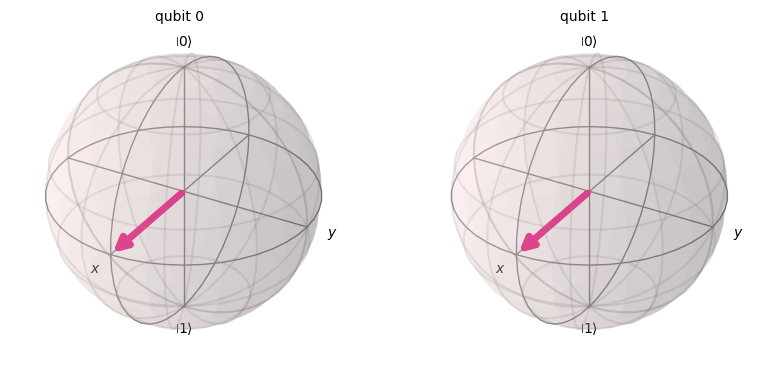

In [68]:
#Visualisierung Einheitskugel
plot_bloch_multivector(simulate_state_vector(grover_circuit))

In [69]:
#Visualisierung Zustandsvektor
vector2latex(simulate_state_vector(grover_circuit), pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

In [70]:
# Oracle für |11>
grover_circuit.h(1)
grover_circuit.cx(0,1)
grover_circuit.h(1)
grover_circuit.draw()

┌───┐               
q_0: ┤ H ├───────■───────
     ├───┤┌───┐┌─┴─┐┌───┐
q_1: ┤ H ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘

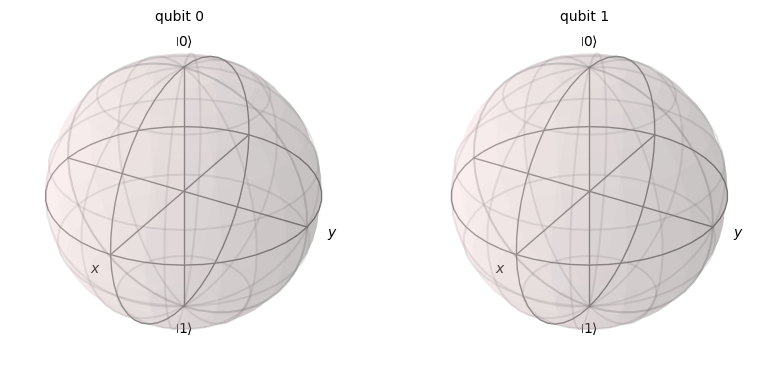

In [71]:
#Visualisierung Einheitskugel
plot_bloch_multivector(simulate_state_vector(grover_circuit))
#Notiz: Die Qubits sind verschränkt.
#Deshalb können sie nicht unabhänig voneinander 
#in der Einheitskugel dargestellt werden

In [72]:
#Visualisierung Zustandsvektor
vector2latex(simulate_state_vector(grover_circuit), pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

In [73]:
# Diffusion Operator
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.h(1)
grover_circuit.cx(0,1)
grover_circuit.h(0)
grover_circuit.draw()

┌───┐          ┌───┐┌───┐               ┌───┐
q_0: ┤ H ├───────■──┤ H ├┤ Z ├────────────■──┤ H ├
     ├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌─┴─┐└───┘
q_1: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ Z ├┤ H ├┤ X ├─────
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘

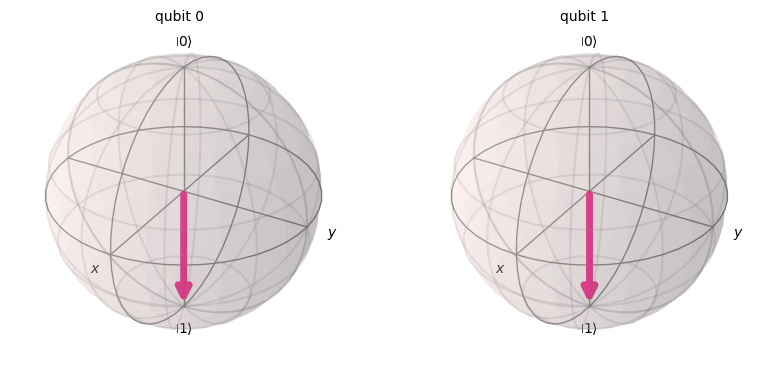

In [74]:
#Visualisierung Einheitskugel
plot_bloch_multivector(simulate_state_vector(grover_circuit))

In [75]:
#Visualisierung Zustandsvektor
vector2latex(simulate_state_vector(grover_circuit), pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

In [76]:
#Ergebnis auslesen
grover_circuit.measure_all()

#Simulieren des Algorithmus
service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")
job = Sampler(backend).run(grover_circuit, shots=1024)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cmbulq4nktricig6ehbg
SamplerResult(quasi_dists=[{3: 1.0}], metadata=[{'shots': 1024, 'circuit_metadata': {}}])


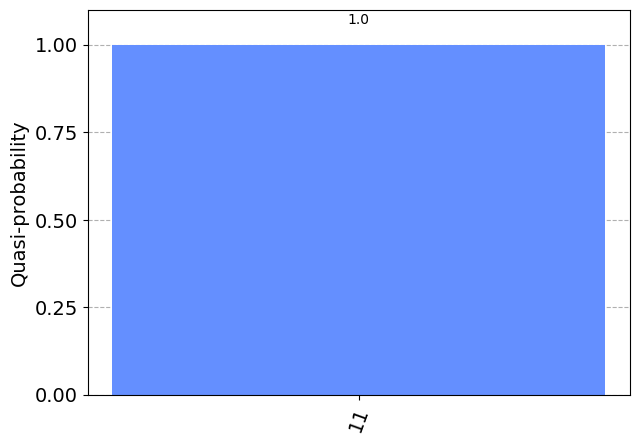

In [77]:
#Wahrscheinlichkeiten der möglichen Ergebnisse
dist = result.quasi_dists[0]
plot_distribution(dist.binary_probabilities())